In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]


pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11516745.853159327
QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8 54594133.48469332
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948241.2675402
ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 558251.7187889507
QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8 48028221.62550312
GJets_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 4650962.691182764
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176175890.397
DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 9614508.800390538
DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11204572.963665916
QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8 15403521.916678991
MonoHs_Mzprime_500_Mhs_90_Mchi_150 297390.70911004825
QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247037.51365295
ZJetsToNuNu_HT-600To800_13TeV-madgraph 5726462.973848986
ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8 6235661.084600944
WJetsToLNu_HT-1200To2500_TuneCP

In [3]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

#process_map["Znunu"] = ("ZJets*",)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

print(hists['recoil'].identifiers('process'))

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nfjets
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers
[<StringBin (Hbb) instance at 0x7fca2fa75da0>, <StringBin (Zjets) instance at 0x7fca298b5ac8>, <StringBin (Diboson) instance at 0x7fca298b5908>, <StringBin (ST) instance at 0x7fca298b5c18>, <StringBin (TT) instance at 0x7fca2b9bdef0>, <StringBin (Wjets) instance at 0x7fca29862ba8>]


In [5]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [6]:
hists['recoil'].project('process','Hbb').values()

{('iszeroL',
  'baggy'): array([2.32308808e+01, 1.50204699e+01, 9.91952627e+00, 6.28005409e+00,
        4.09699870e+00, 3.24174262e+00, 2.43887603e+00, 1.49962709e+00,
        9.29429087e-01, 6.84923469e-01, 5.60367390e-01, 3.15471600e-01,
        2.41066146e-01, 1.61115472e-01, 9.25917753e-02, 9.75905766e-02,
        4.31515625e-02, 3.41768436e-02, 3.31336419e-02, 1.61644054e-02,
        9.07513379e-03]),
 ('iszeroL',
  'skinny'): array([2.22057219e+01, 1.41843628e+01, 9.08976910e+00, 6.27491051e+00,
        3.95590087e+00, 2.91747542e+00, 2.48807626e+00, 1.56019215e+00,
        9.68844568e-01, 6.04189185e-01, 4.43689535e-01, 2.46185713e-01,
        1.38791369e-01, 7.88507347e-02, 5.91558379e-02, 5.54493398e-02,
        2.97794468e-02, 2.28573657e-02, 1.26829373e-02, 4.85260939e-03,
        4.29070403e-03]),
 ('iszeroL',
  'inclusive'): array([4.54366027e+01, 2.92048327e+01, 1.90092954e+01, 1.25549646e+01,
        8.05289957e+00, 6.15921804e+00, 4.92695228e+00, 3.05981924e+00,
       

In [7]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
    exp = 0
    print('------------------')
    print('------------------')
    print('Category:',r)
    print('------------------')
    for p in hists['recoil'].identifiers('process'):
        yld = np.sum(hists['recoil'].project('region',r).project('process', p).values(overflow='all')[()])
        exp += yld
        print(p, '%.1f' % yld)
    print('------------------')
    print('Total expected:', '%.1f' % exp)
    print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('region',r).project('process', data_map[r]).values(overflow='all')[()]))
    print('------------------')
    print('------------------')
    print()

------------------
------------------
Category: isoneE
------------------


KeyError: ()

ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

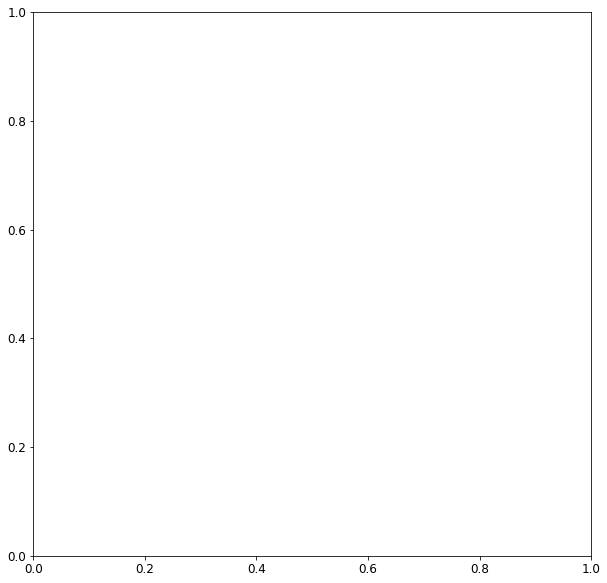

In [8]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
           )

    plot.plot1d(hists[key].project('region','isoneM'), ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"60 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

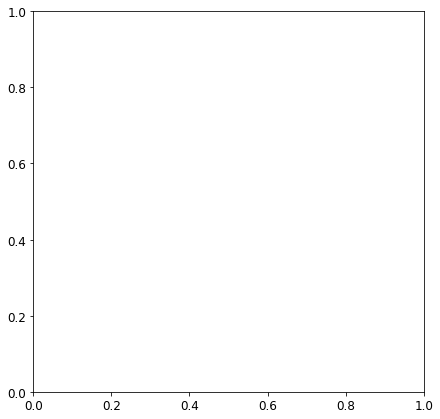

In [9]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)